Романовский А.Н. 11.10.2022
___
### Задача:

Скачать данные из репозитория UCI (для задач регрессии) и подготовить данные для модели:
Подготовить данные для последующей обработки. Для этого мы 
1. Нормализуем все данные. Скалируем все данные в диапозоне от -1 до 1 
2. Обрабатываем пропуски. Обрабатываем выбросы.
3. Строим матрицу корреляции.
4. Строим гистограммы распределения
5. Ищем (взоимозависимые данные).
6. Тест на нормальность


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_excel('Real estate valuation data set.xlsx')
data.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


___
* Из data.info видно, что в данных нет пропусков
* Построим гистограммы распределения 
___

In [4]:
data.drop(['No'], inplace=True, axis=1) #удалим коллонку с номером строк

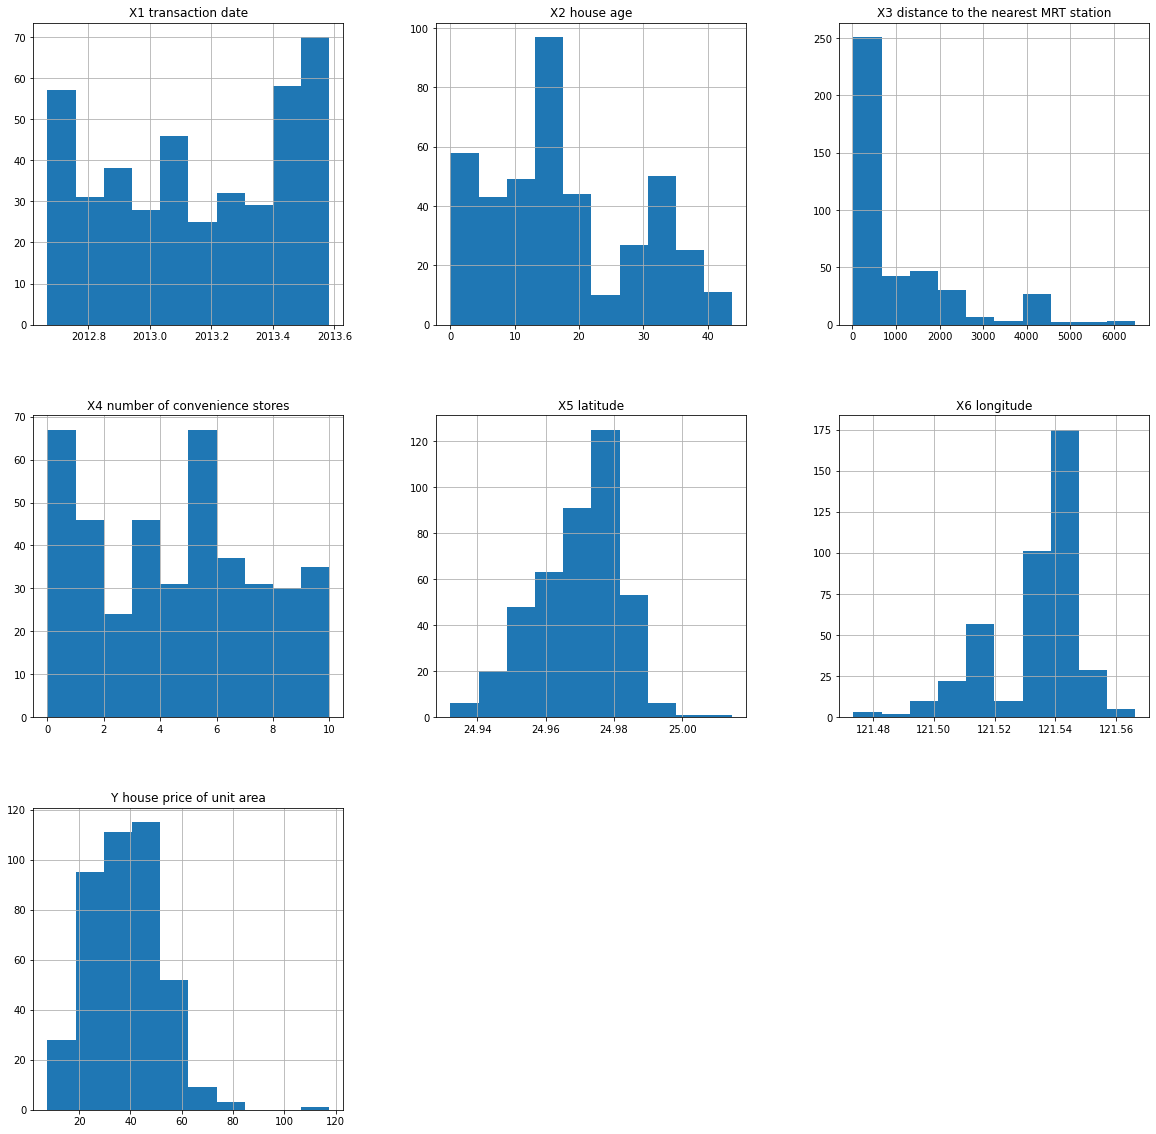

In [5]:
data.hist(figsize=(20,20))
pyplot.show()

---
* Нормализация данных
* За эксперементальную колонку взята 'Y house price of unit area'
* Функция для отоброжения грфиков распределения и QQplot график для оценики отклонения данных от нормально распределенных
____

In [6]:
def graph(df, col):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[col].hist(bins = 40)
    
    plt.subplot(1, 2, 2)
    stats.probplot(df[col], dist = "norm", plot = plt)
    plt.show

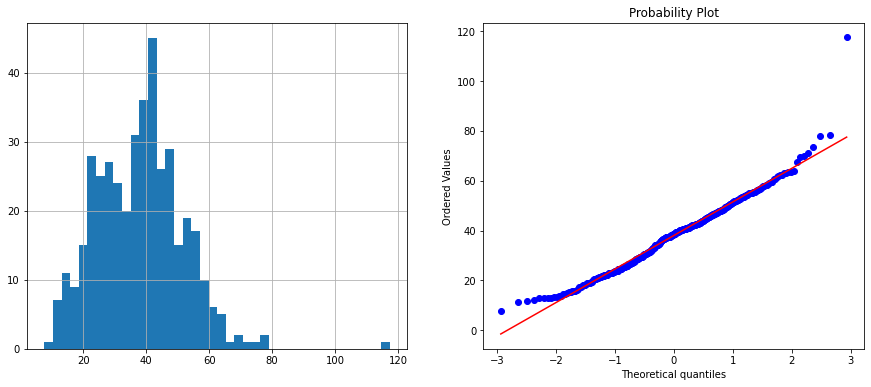

In [7]:
graph(data, 'Y house price of unit area')

___
* Для нормализации возведем все данные в 0.555 степень 
___

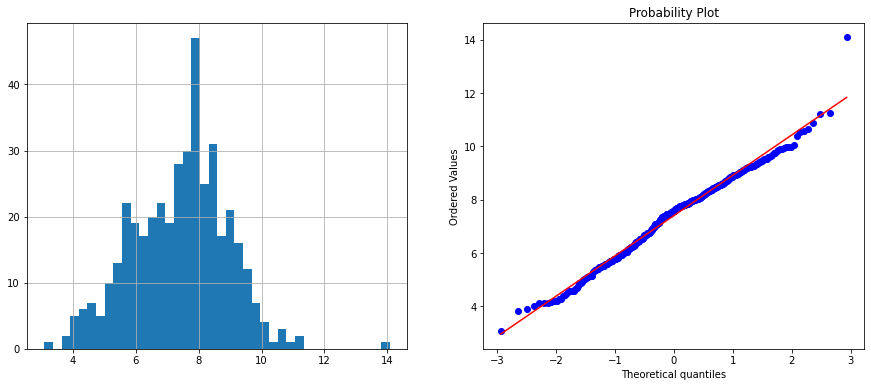

In [8]:
new_data = pd.DataFrame()
for col in data:
    new_data[col] =(data[col]) **(0.555)
graph(new_data, 'Y house price of unit area')

In [9]:
new_data

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,68.174713,6.844760,11.762066,3.589219,5.966128,14.355544,7.518735
1,68.174713,5.199591,23.990725,3.385358,5.965778,14.355496,7.980836
2,68.187243,4.204726,33.581262,2.443027,5.966722,14.355784,8.502525
3,68.185677,4.204726,33.581262,2.443027,5.966722,14.355784,9.226207
4,68.173146,2.443027,27.440492,2.443027,5.965649,14.355689,8.074858
...,...,...,...,...,...,...,...
409,68.176279,4.274447,100.933516,0.000000,5.960635,14.353156,4.561146
410,68.170013,2.601623,12.184926,3.385358,5.964981,14.355731,8.768562
411,68.180978,5.095157,27.456132,2.944621,5.965631,14.355519,7.811455
412,68.176279,3.193075,13.222809,2.443027,5.963975,14.355572,9.009245


----
* Удалим все выбросы
* И скалируем в диапазоне от -1 до 1
____

In [10]:
new_data=new_data[(np.abs(stats.zscore(new_data)) < 3).all(axis=1)] #перезапишем данные после удаления выбросов в новый Df

scaled = (MinMaxScaler(feature_range=(-1,1)).fit_transform(new_data))
new_data = pd.DataFrame(scaled, columns = new_data.columns)
new_data.shape




(407, 7)

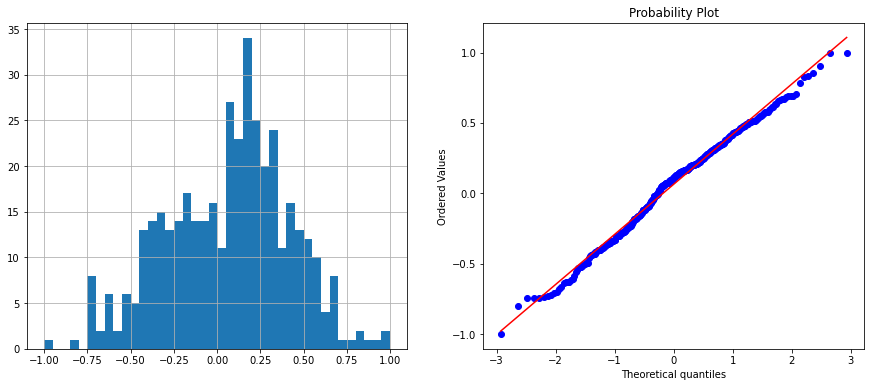

In [11]:
graph(new_data, 'Y house price of unit area') #видно из графика что выброс удален 

<AxesSubplot:>

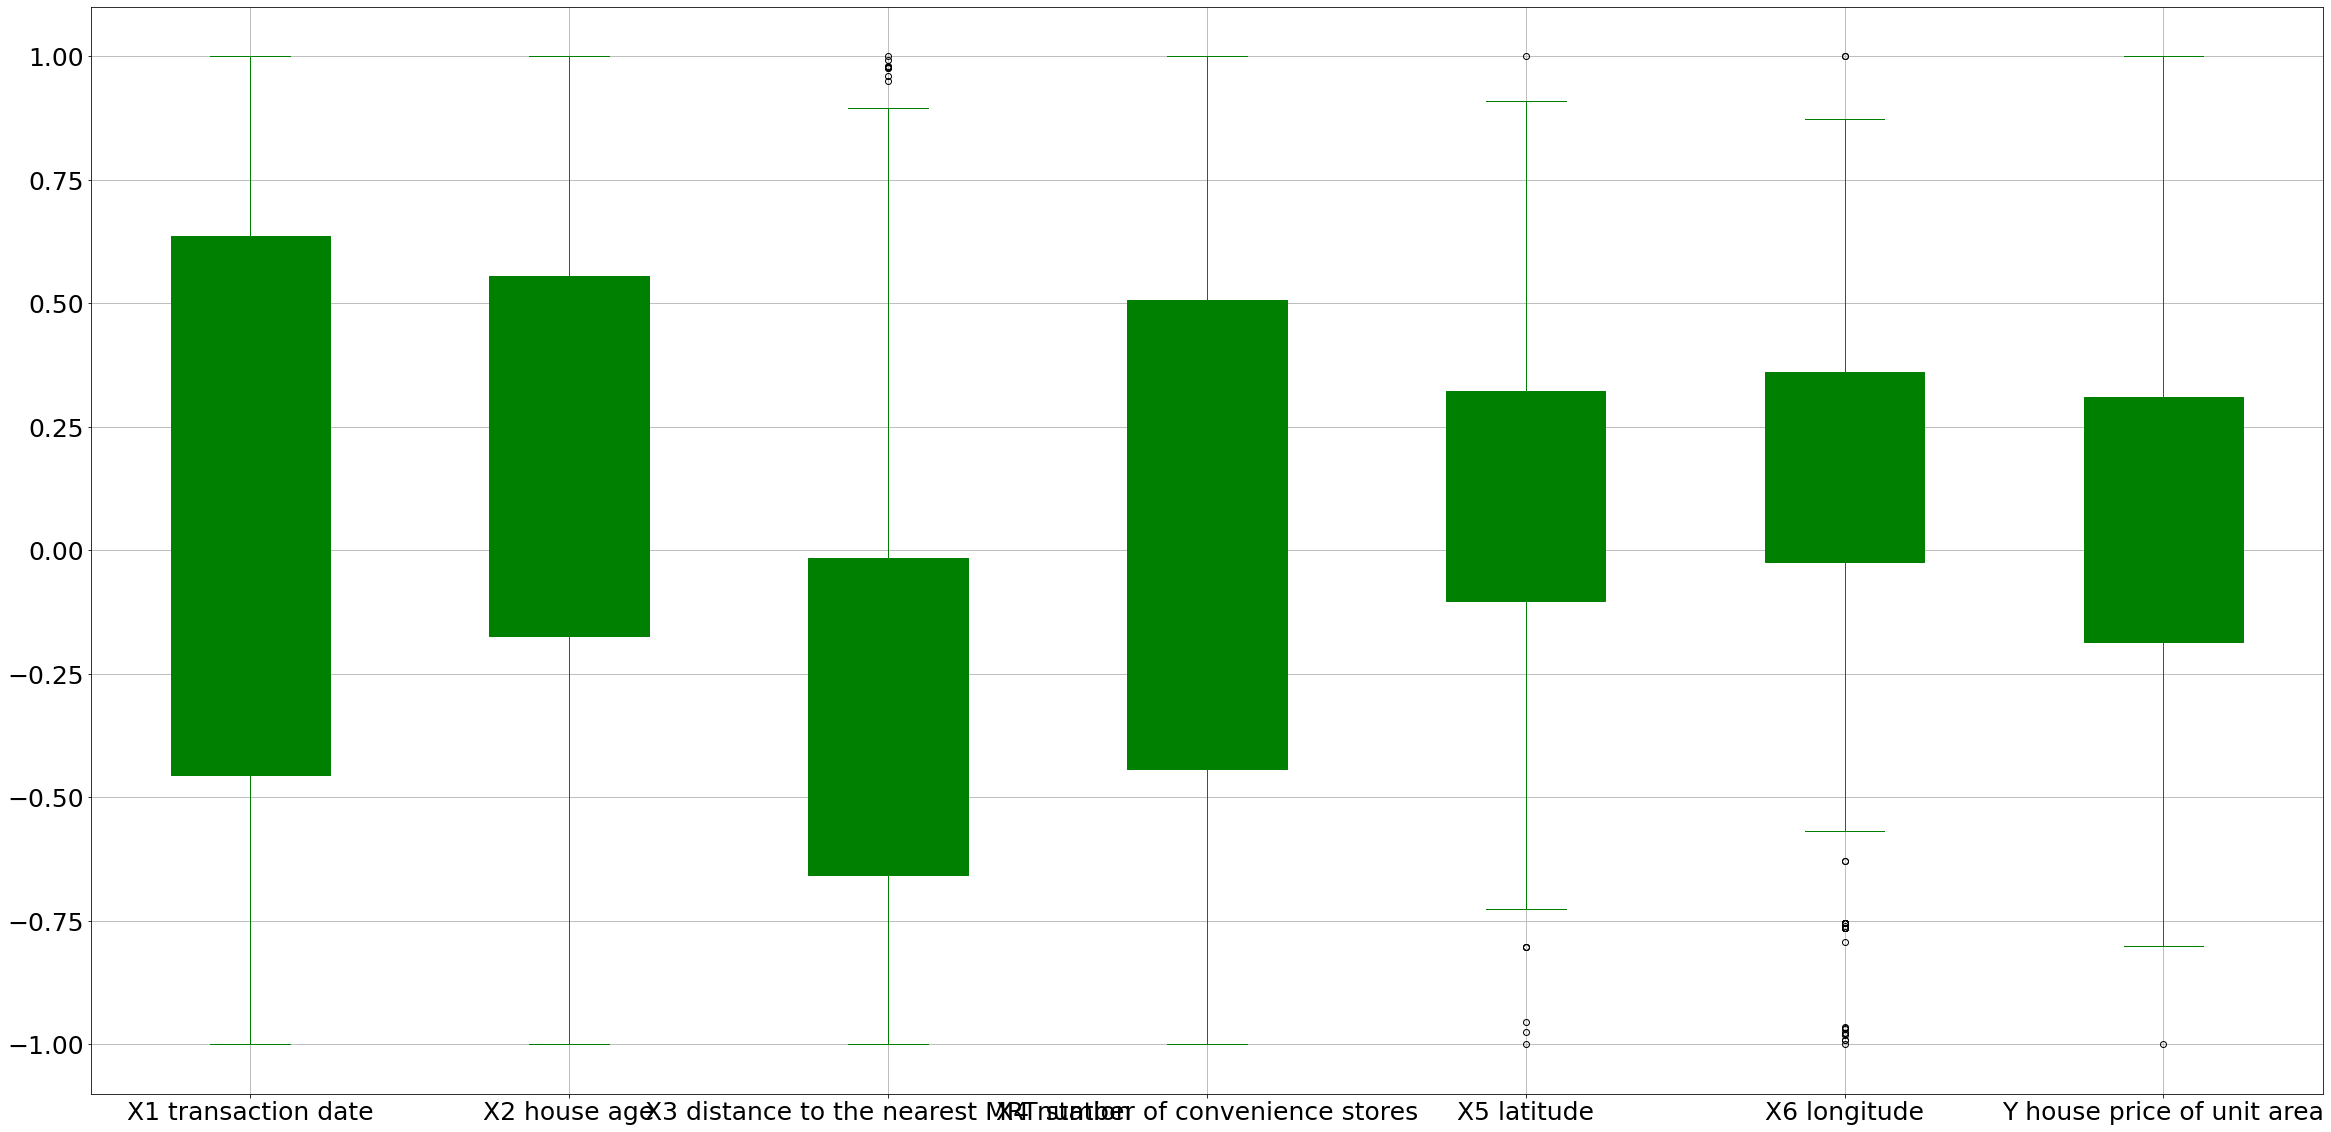

In [12]:
new_data.boxplot(figsize=(40,20), color = 'g', patch_artist=True, fontsize = 25)

____
* Строим матрицу корреляции
___

<AxesSubplot:>

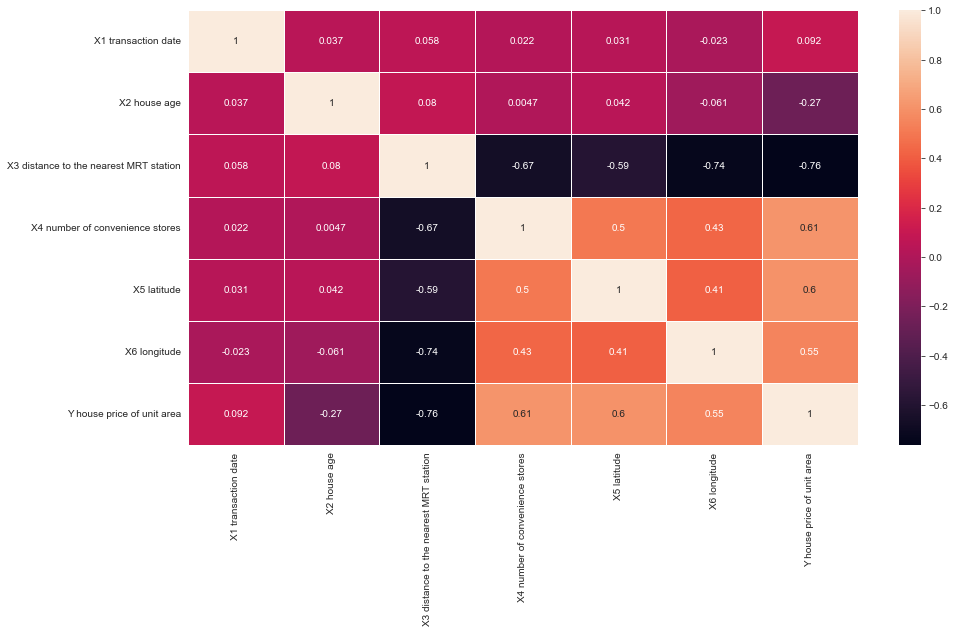

In [13]:
corr_matrix = new_data.corr()
corr_matrix
sns.set({'figure.figsize':(15,8)})
sns.heatmap(corr_matrix, annot=True, linewidths=1)

___
* Построим гистограммы распределения
___

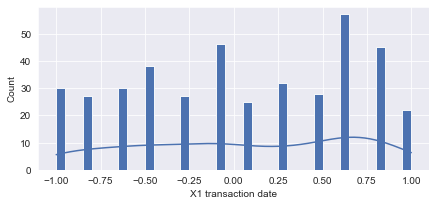

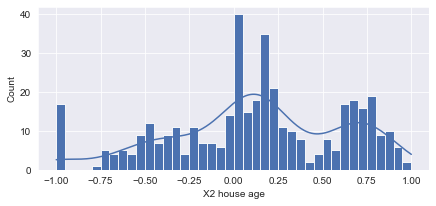

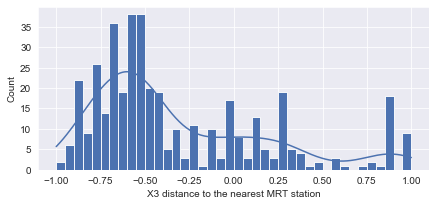

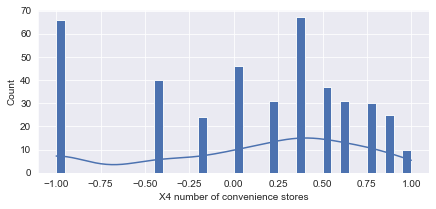

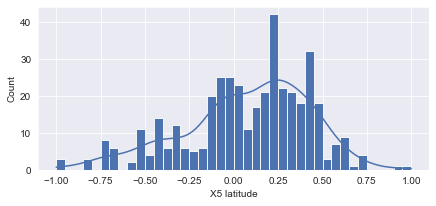

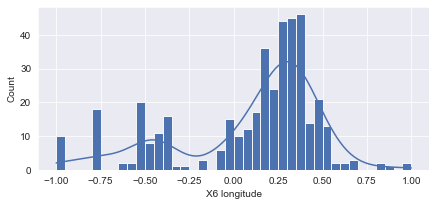

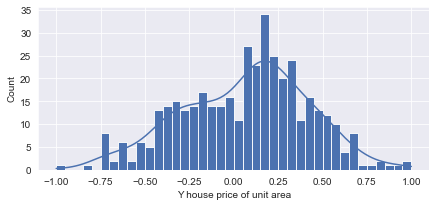

In [14]:
for col in new_data:
    plt.figure(figsize=(7,3))
    sns.histplot(new_data[col], kde=True, bins = 40, alpha = 1)
    plt.show()

___
* Поиск линейной зависимости в данных, при помощи коэффициента корреляции Пирсона
___


In [15]:
from scipy.stats import pearsonr
for col in new_data:
    corr, p = pearsonr(new_data['Y house price of unit area'], new_data[col])
    print(f'Kоэффициент корреляции {"Y house price of unit area"} и {col} составляет {corr}\n')

Kоэффициент корреляции Y house price of unit area и X1 transaction date составляет 0.09213440423947993

Kоэффициент корреляции Y house price of unit area и X2 house age составляет -0.26820759897937335

Kоэффициент корреляции Y house price of unit area и X3 distance to the nearest MRT station составляет -0.7617168527950269

Kоэффициент корреляции Y house price of unit area и X4 number of convenience stores составляет 0.6102937712049836

Kоэффициент корреляции Y house price of unit area и X5 latitude составляет 0.6012119856297157

Kоэффициент корреляции Y house price of unit area и X6 longitude составляет 0.5460640793176759

Kоэффициент корреляции Y house price of unit area и Y house price of unit area составляет 1.0



___
* Тест на нормальность
___

In [16]:
for col in new_data:    
    stat, p = stats.normaltest(new_data[col])
    print('Statistics=%.3f, p-value=%.3f' % (stat, p))

    alpha = 0.05
    if p > alpha:
        print('Принять гипотезу о нормальности')
    else:
        print('Отклонить гипотезу о нормальности')

Statistics=296.383, p-value=0.000
Отклонить гипотезу о нормальности
Statistics=12.191, p-value=0.002
Отклонить гипотезу о нормальности
Statistics=58.665, p-value=0.000
Отклонить гипотезу о нормальности
Statistics=48.357, p-value=0.000
Отклонить гипотезу о нормальности
Statistics=20.902, p-value=0.000
Отклонить гипотезу о нормальности
Statistics=52.523, p-value=0.000
Отклонить гипотезу о нормальности
Statistics=4.677, p-value=0.096
Принять гипотезу о нормальности


___
* Из представленных данных, распределены нормально только данные из колонки Y house price of unit area
____

___
### Вывод:
* Из анализа корреляции видно, что цена дома 'Y house price of unit area' имеет положительную зависимость с географичесуим расположением и колличеством круглосуточных магазинов. Отсюда следует, при расширении инфорструктуры - цена на дом будет возрастать


* Из анализа корреляции видно, что цена дома 'Y house price of unit area' имеет отрицательную зависимость параметром возраста дома и растояния до ближайшей станции МРТ. Отсюда следует что при увеличении возраста и увеличении растояния - цена на дом  уменьшится 